In [107]:
import pandas as pd

In [109]:
# Load dataset
df = pd.read_csv("H:\\Datascience\\Tutedude\\employee_data.csv")

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   EmployeeID           Name  Age   Department  Salary  YearsAtCompany  \
0           1       John Doe   29        Sales   55000               3   
1           2     Jane Smith   35           HR   60000               7   
2           3  Michael Brown   40  Engineering   80000              10   
3           4    Emily Davis   28    Marketing   65000               5   
4           5  David Johnson   50        Sales   75000              20   

   PerformanceScore Attrition  
0                80        No  
1                85        No  
2                95       Yes  
3                78        No  
4                88       Yes  


In [110]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64


In [113]:
# Drop duplicates (if any)
df.drop_duplicates(inplace=True)

In [115]:
# Optionally fill or drop missing values
# Example: fill missing numerical values with median
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df['YearsAtCompany'] = df['YearsAtCompany'].fillna(df['YearsAtCompany'].median())
df['PerformanceScore'] = df['PerformanceScore'].fillna(df['PerformanceScore'].mean())

In [117]:
# For categorical columns, fill with mode
df['Department'] = df['Department'].fillna(df['Department'].mode()[0])
df['Attrition'] = df['Attrition'].fillna(df['Attrition'].mode()[0])
df['Name'] = df['Name'].fillna("Unknown")

In [119]:
# Clean inconsistent entries (optional - example: strip spaces, standardize text)
df['Department'] = df['Department'].str.strip().str.title()
df['Attrition'] = df['Attrition'].str.strip().str.capitalize()

# Final check
print("\nData after preprocessing:")
print(df.info())


Data after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB
None


In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
# Ensure plots display inside Jupyter notebook (if using one)
%matplotlib inline  

# Descriptive Statistics
print(" Descriptive Statistics:\n")
print(df.describe())

print("\n Mode of each column:")
print(df.mode().iloc[0])

print("\n Variance:\n", df.var(numeric_only=True))
print("\n Standard Deviation:\n", df.std(numeric_only=True))


 Descriptive Statistics:

       EmployeeID         Age        Salary  YearsAtCompany  PerformanceScore
count  100.000000  100.000000    100.000000      100.000000        100.000000
mean    50.500000   36.570000  72820.000000       10.800000         84.940000
std     29.011492    8.318478  12643.823102        6.361183          6.349771
min      1.000000   25.000000  43000.000000        1.000000         70.000000
25%     25.750000   29.750000  65000.000000        5.000000         80.000000
50%     50.500000   35.000000  72000.000000       10.000000         85.500000
75%     75.250000   41.250000  82750.000000       16.000000         90.000000
max    100.000000   60.000000  95000.000000       25.000000         95.000000

 Mode of each column:
EmployeeID                     1
Name                James Walker
Age                         29.0
Department           Engineering
Salary                   68000.0
YearsAtCompany               2.0
PerformanceScore            80.0
Attrition         


🔍 Generating pairplot...


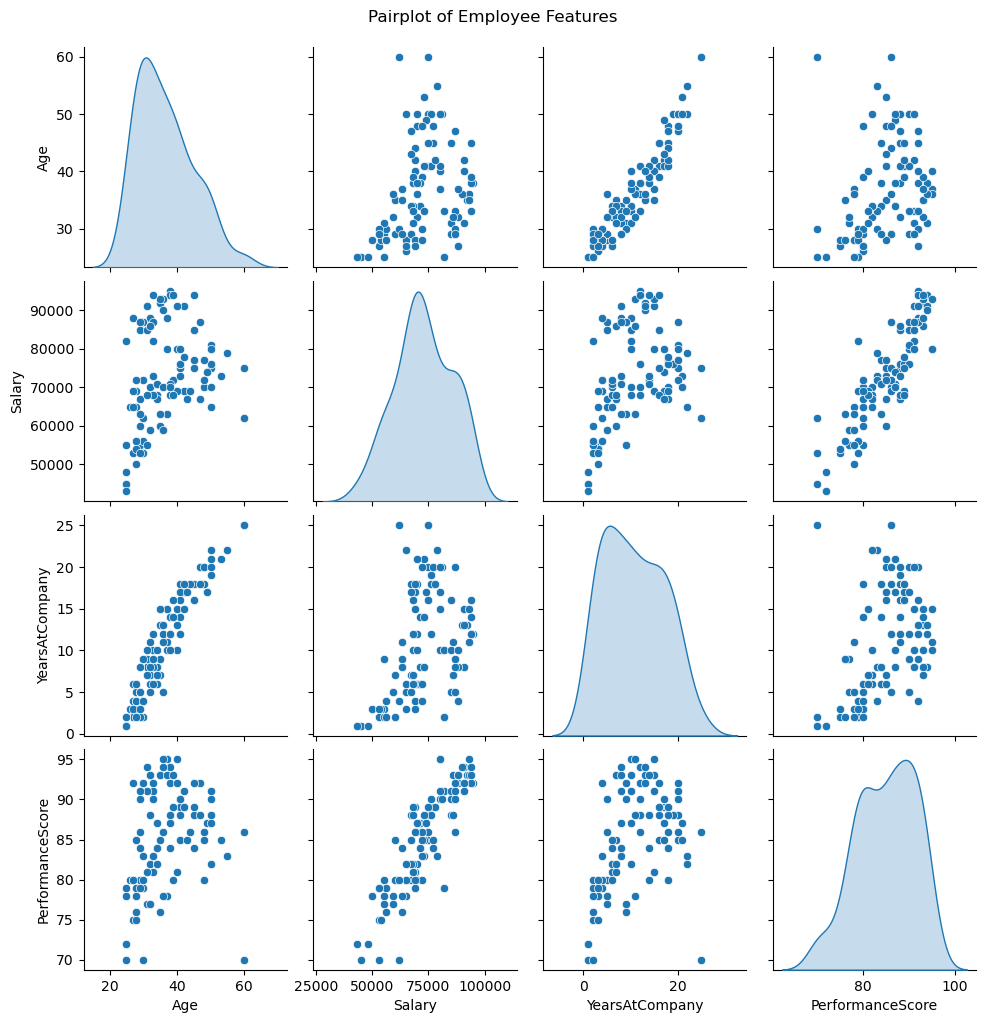

In [19]:
# Pairplot - relationships between multiple features
print("\n Generating pairplot...")
sns.pairplot(df[['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']], diag_kind='kde')
plt.suptitle("Pairplot of Employee Features", y=1.02)
plt.show()


 Generating heatmap...


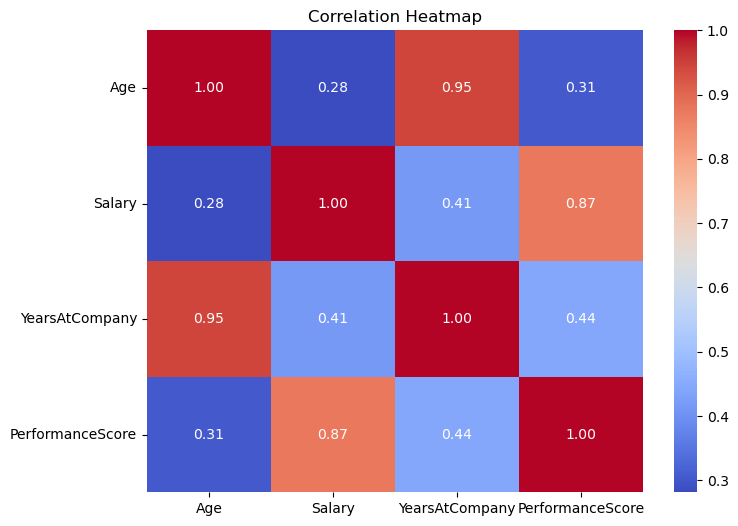

In [125]:
# Correlation Heatmap
print("\n Generating heatmap...")
plt.figure(figsize=(8, 6))
correlation = df[['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


 Generating boxplots...


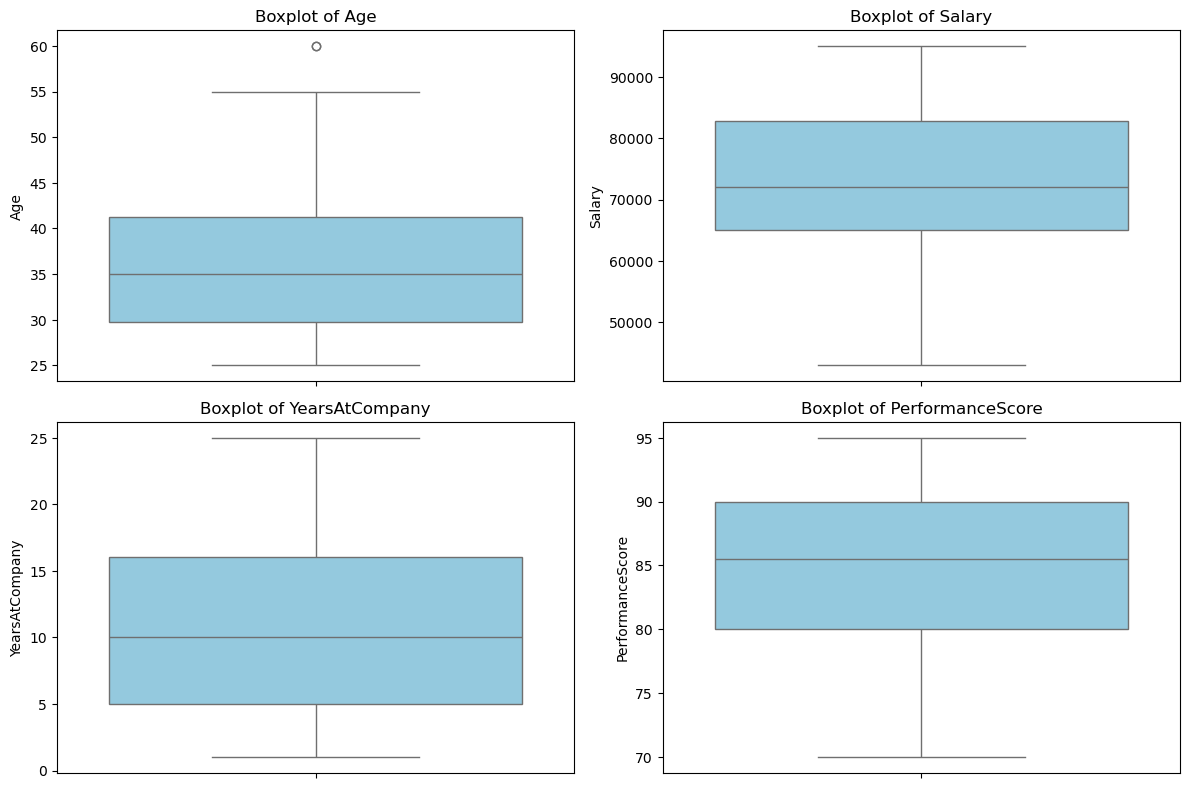

In [127]:
# Outlier Detection using Boxplots
print("\n Generating boxplots...")
num_cols = ['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']
plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [27]:
import numpy as np
from scipy.stats import ttest_ind, f_oneway

In [129]:
# Overall probability of attrition
p_attrition = (df['Attrition'] == 'Yes').mean()
print(f" P(Attrition): {p_attrition:.2f}")

 P(Attrition): 0.39


In [131]:
# Probability of attrition per department
p_attrition_by_dept = df.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').mean())
print("\n P(Attrition | Department):\n", p_attrition_by_dept)


 P(Attrition | Department):
 Department
Engineering    0.428571
Hr             0.346154
Marketing      0.200000
Sales          0.538462
Name: Attrition, dtype: float64


In [133]:
# Probability of attrition based on low performance
threshold = df['PerformanceScore'].median()
p_attrition_low_perf = df[df['PerformanceScore'] < threshold]['Attrition'].value_counts(normalize=True).get('Yes', 0)
print(f"\n P(Attrition | PerformanceScore < {threshold}): {p_attrition_low_perf:.2f}")


 P(Attrition | PerformanceScore < 85.5): 0.32


In [135]:
# Prior: P(A)
p_A = (df['Attrition'] == 'Yes').mean()

# Likelihood: P(B|A) = P(Low Performance | Attrition)
p_B_given_A = df[(df['Attrition'] == 'Yes') & (df['PerformanceScore'] < threshold)].shape[0] / df[df['Attrition'] == 'Yes'].shape[0]

# Marginal: P(B)
p_B = (df['PerformanceScore'] < threshold).mean()

# Bayes: P(Attrition | Low Performance)
p_A_given_B = (p_B_given_A * p_A) / p_B

print(f"\n Bayes' Theorem → P(Attrition | Low Performance): {p_A_given_B:.2f}")


 Bayes' Theorem → P(Attrition | Low Performance): 0.32


In [137]:
# Group performance scores by department
groups = [group['PerformanceScore'].values for _, group in df.groupby('Department')]

# One-way ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"\n ANOVA test for PerformanceScore across Departments:")
print(f"F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("Reject null hypothesis: There is a significant difference in means.")
else:
    print("Fail to reject null: No significant difference found.")


 ANOVA test for PerformanceScore across Departments:
F-statistic = 25.78, p-value = 0.0000
Reject null hypothesis: There is a significant difference in means.


In [139]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [141]:
# Create a copy to avoid modifying original DataFrame
df_encoded = df.copy()

# Define numerical columns
num_cols = ['Salary', 'PerformanceScore']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

print("Scaled Numerical Columns:")
print(df_encoded[num_cols].head())

Scaled Numerical Columns:
     Salary  PerformanceScore
0  0.230769              0.40
1  0.326923              0.60
2  0.711538              1.00
3  0.423077              0.32
4  0.615385              0.72


In [143]:
# Define categorical columns
cat_cols = ['Attrition', 'Department']

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode each categorical column
for col in cat_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

print("\n Encoded Categorical Columns:")
print(df_encoded[cat_cols].head())


 Encoded Categorical Columns:
   Attrition  Department
0          0           3
1          0           1
2          1           0
3          0           2
4          1           3


In [145]:
print("\n Final Encoded and Scaled DataFrame:")
print(df_encoded.head())


 Final Encoded and Scaled DataFrame:
   EmployeeID           Name  Age  Department    Salary  YearsAtCompany  \
0           1       John Doe   29           3  0.230769               3   
1           2     Jane Smith   35           1  0.326923               7   
2           3  Michael Brown   40           0  0.711538              10   
3           4    Emily Davis   28           2  0.423077               5   
4           5  David Johnson   50           3  0.615385              20   

   PerformanceScore  Attrition  
0              0.40          0  
1              0.60          0  
2              1.00          1  
3              0.32          0  
4              0.72          1  


In [147]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [149]:
# Assuming 'Attrition' is already label encoded (0 = No, 1 = Yes)
X = df_encoded.drop(['EmployeeID', 'Name', 'Attrition'], axis=1)  # Drop irrelevant or target columns
y = df_encoded['Attrition']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [153]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [155]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.70
Precision: 0.67
Recall: 0.50
F1 Score: 0.57


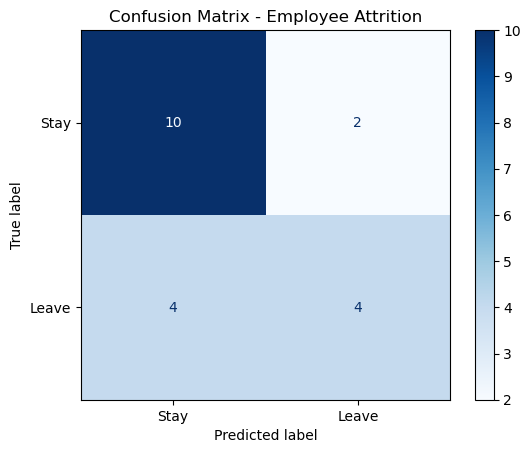

In [157]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stay', 'Leave'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Employee Attrition")
plt.show()

In [159]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("\n Logistic Regression Scores:")
print(f"Accuracy: {accuracy_score(y_test, log_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, log_pred):.2f}")


 Logistic Regression Scores:
Accuracy: 0.65
F1 Score: 0.46


In [197]:
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [199]:
# Ensure 'Performance Score' is numeric and already scaled/encoded in df_encoded
X_reg = df_encoded.drop(['EmployeeID', 'Name', 'Attrition', 'PerformanceScore'], axis=1)
y_reg = df_encoded['PerformanceScore']

In [201]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [202]:
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

In [205]:
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" R-squared (R²): {r2:.2f}")

 Mean Squared Error (MSE): 0.02
 R-squared (R²): 0.75


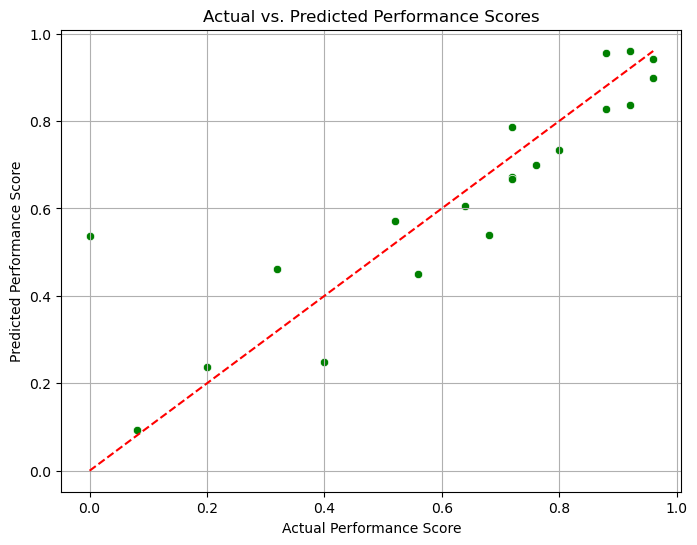

In [207]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, color='green')
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs. Predicted Performance Scores")
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()

In [209]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [211]:
# Features and target
X = df_encoded.drop(['EmployeeID', 'Name', 'Attrition', 'PerformanceScore'], axis=1)
y = df_encoded['PerformanceScore']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [213]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Regression output

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

C:\Users\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [214]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=0)

In [215]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f" Test Loss (MSE): {loss:.2f}")
print(f" Test MAE: {mae:.2f}")

 Test Loss (MSE): 0.04
 Test MAE: 0.11


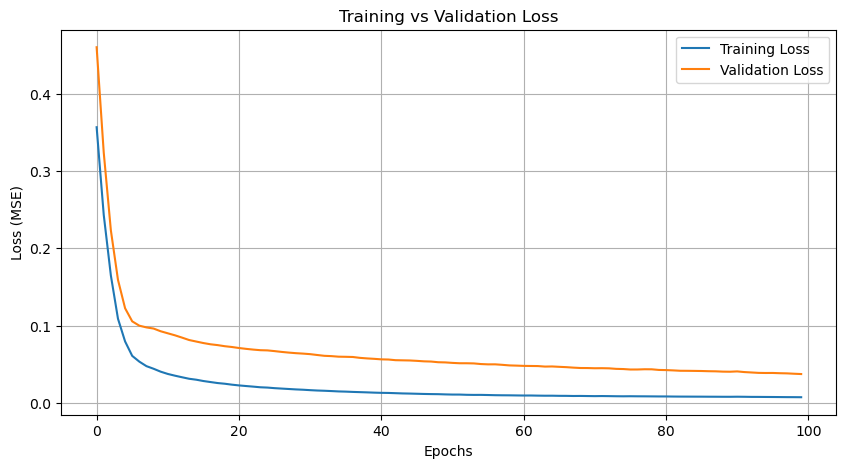

In [217]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

In [219]:
# Features (drop identifiers and target)
X_cls = df_encoded.drop(['EmployeeID', 'Name', 'Attrition', 'PerformanceScore'], axis=1)

# Target
y_cls = df_encoded['Attrition']  # Already label encoded (0 = No, 1 = Yes)

# Scale the features
scaler = StandardScaler()
X_cls_scaled = scaler.fit_transform(X_cls)

# Train-test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls_scaled, y_cls, test_size=0.2, random_state=42)

In [220]:
model_cls = Sequential()
model_cls.add(Dense(32, input_dim=X_train_cls.shape[1], activation='relu'))
model_cls.add(Dense(16, activation='relu'))
model_cls.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model_cls.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [221]:
model_cls.fit(X_train_cls, y_train_cls, epochs=50, batch_size=16, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
 Accuracy: 0.55
 Precision: 0.375
 Recall: 0.42857142857142855
 F1 Score: 0.4

 Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.62      0.64        13
           1       0.38      0.43      0.40         7

    accuracy                           0.55        20
   macro avg       0.52      0.52      0.52        20
weighted avg       0.56      0.55      0.56        20



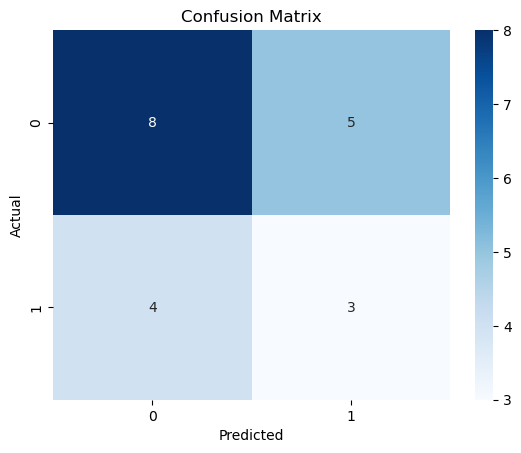

In [222]:
# Predict on test set
y_pred_prob = model_cls.predict(X_test_cls)
y_pred_cls = (y_pred_prob > 0.5).astype(int)

# Metrics
print(" Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print(" Precision:", precision_score(y_test_cls, y_pred_cls))
print(" Recall:", recall_score(y_test_cls, y_pred_cls))
print(" F1 Score:", f1_score(y_test_cls, y_pred_cls))

# Classification report
print("\n Classification Report:\n")
print(classification_report(y_test_cls, y_pred_cls))

# Confusion matrix
cm = confusion_matrix(y_test_cls, y_pred_cls)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()